# Workshop Week 4

# Deep Learning for Name Gender Classification

We have already seen the following code for partitioning the data of name gender classification and feature extraction. The code is changed slightly so that the labels are numerical (0 for male, 1 for female). This is the format required for Keras:

In [1]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to /home/diego/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name,0) for name in m] +
         [(name,1) for name in f])
random.shuffle(names)
train_names = names[1000:]
devtest_names = names[500:1000]
test_names = names[:500]

In [3]:
def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result = [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i >= 0:
        result[i] = 1
    else:
        result[len(alphabet)] = 1 # character is out of the alphabet
    return result

def gender_features_n(word, n=2):
    "Return the one-hot encodings of the last n characters"
    features = []
    for i in range(n):
        if i < len(word):
            features = one_hot_character(word[-i-1]) + features
        else:
            features = one_hot_character(' ') + features
    return features

In [4]:
gender_features_n("Mary", n=2)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [5]:
# Let's determine the number of features so that we can use this information when we design the neural network
len(gender_features_n("Mary", n=2))

54

## Exercise: Simple Neural Network
Design a simple neural network that has 55 input cells (that's the number of gender features for $n=2$, as we have seen above), and one output cell (without a hidden layer). The output cell will be used to classify the name between male (output=0) and female (output=1). This is therefore an instance of **binary classification**. Pay attention to the right activation function! This simple model, without hidden layers, is equivalent to a **logistic regression** classifier. The model summary should look like this:

```
Layer (type)                 Output Shape              Param #   
=================================================================
dense_2 (Dense)              (None, 1)                 55        
=================================================================
Total params: 55
Trainable params: 55
Non-trainable params: 0
```


Compile the model and provide the right loss function. Use `'rmsprop'` as the optimiser, and include `'accuracy'` as an evaluation metric. 
Run the network **for 100 epochs** using batch size of 100, and observe the results. 

Answer the following questions:

1. What is the best result on the validation set?
2. At the epoch with best result on the validation set, what is the result on the training set?
3. Is the system overfitting? Justify your answer.
4. Do we really need 100 epochs? Do we need more than 100 epochs? would the system run better with less epochs?

In [6]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [8]:
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(54,)))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 55        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [10]:
# We will use 2 features, but feel free to try with different numbers of features.
# The results in the exercises will be different when you use different numbers of features.
train_data = np.array([gender_features_n(name, n=2) for name, label in train_names])
train_labels = np.array([label for name, label in train_names])

devtest_data = np.array([gender_features_n(name, n=2) for name, label in devtest_names])
devtest_labels = np.array([label for name, label in devtest_names])

test_data = np.array([gender_features_n(name, n=2) for name, label in test_names])
test_labels = np.array([name for name, label in test_names])

In [11]:
history = model.fit(np.array(train_data),
                    train_labels,
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, devtest_labels))

Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.5377 - val_loss: 0.6837 - val_accuracy: 0.5880
Epoch 2/100
70/70 [==============================] - 0s 852us/step - loss: 0.6706 - accuracy: 0.5867 - val_loss: 0.6589 - val_accuracy: 0.6080
Epoch 3/100
70/70 [==============================] - 0s 882us/step - loss: 0.6456 - accuracy: 0.6508 - val_loss: 0.6377 - val_accuracy: 0.6880
Epoch 4/100
70/70 [==============================] - 0s 772us/step - loss: 0.6244 - accuracy: 0.7115 - val_loss: 0.6200 - val_accuracy: 0.6920
Epoch 5/100
70/70 [==============================] - 0s 786us/step - loss: 0.6067 - accuracy: 0.7167 - val_loss: 0.6056 - val_accuracy: 0.7040
Epoch 6/100
70/70 [==============================] - 0s 839us/step - loss: 0.5920 - accuracy: 0.7241 - val_loss: 0.5936 - val_accuracy: 0.7060
Epoch 7/100
70/70 [==============================] - 0s 803us/step - loss: 0.5792 - accuracy: 0.7236 - val_loss: 0.5831 - val_accuracy: 0.7120
E

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

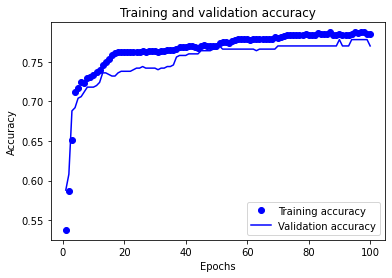

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    
plot_history(history)

*(Accuracy at the devtest set stalls at epoch 70 so we could have stopped there. At that point, accuracy is 0.77 whereas accuracy at train set is 0.7795. The difference is rather small, so it seems there is not much overfitting*).

## Exercise: A Deeper Network
Experiment with a network that has one hidden dense layer with a `'relu'` activation. The resulting system is no longer a logistic regression classifier, it's something more complex. Try with the following sizes in the hidden layer:

* 5, 10, 20

Answer the following questions:

1. Which system performed best on the dev-test set?
2. Would you add more or less cells in the hidden layer? Justify your answer.
3. Is this system better than the simpler system of the previous exercise? Justify your answer.

In [14]:
model = models.Sequential()
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(np.array(train_data),
                    train_labels,
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, devtest_labels))

Epoch 1/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6447 - val_loss: 0.6122 - val_accuracy: 0.7180
Epoch 2/100
70/70 [==============================] - 0s 866us/step - loss: 0.5901 - accuracy: 0.7179 - val_loss: 0.5705 - val_accuracy: 0.7200
Epoch 3/100
70/70 [==============================] - 0s 828us/step - loss: 0.5510 - accuracy: 0.7310 - val_loss: 0.5424 - val_accuracy: 0.7200
Epoch 4/100
70/70 [==============================] - 0s 789us/step - loss: 0.5205 - accuracy: 0.7478 - val_loss: 0.5225 - val_accuracy: 0.7280
Epoch 5/100
70/70 [==============================] - 0s 790us/step - loss: 0.4967 - accuracy: 0.7594 - val_loss: 0.5079 - val_accuracy: 0.7320
Epoch 6/100
70/70 [==============================] - 0s 828us/step - loss: 0.4792 - accuracy: 0.7622 - val_loss: 0.4989 - val_accuracy: 0.7360
Epoch 7/100
70/70 [==============================] - 0s 833us/step - loss: 0.4667 - accuracy: 0.7663 - val_loss: 0.4917 - val_accuracy: 0.7540
E

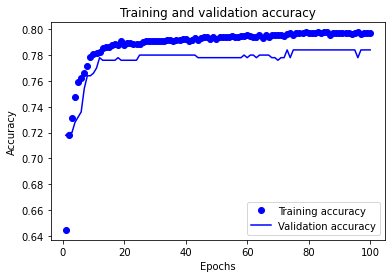

In [16]:
plot_history(history)

*(With hidden layer of size 5, the system achieved slightly better results after a few epochs. Again there isn't much overfitting.*)

In [17]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(np.array(train_data),
                    train_labels,
                    epochs=200,
                    batch_size=100,
                    validation_data=(devtest_data, devtest_labels))

218 - accuracy: 0.7944 - val_loss: 0.4613 - val_accuracy: 0.7760
Epoch 63/200
70/70 [==============================] - 0s 813us/step - loss: 0.4217 - accuracy: 0.7941 - val_loss: 0.4610 - val_accuracy: 0.7740
Epoch 64/200
70/70 [==============================] - 0s 770us/step - loss: 0.4216 - accuracy: 0.7944 - val_loss: 0.4613 - val_accuracy: 0.7740
Epoch 65/200
70/70 [==============================] - 0s 713us/step - loss: 0.4215 - accuracy: 0.7929 - val_loss: 0.4607 - val_accuracy: 0.7740
Epoch 66/200
70/70 [==============================] - 0s 759us/step - loss: 0.4213 - accuracy: 0.7944 - val_loss: 0.4609 - val_accuracy: 0.7740
Epoch 67/200
70/70 [==============================] - 0s 784us/step - loss: 0.4212 - accuracy: 0.7941 - val_loss: 0.4613 - val_accuracy: 0.7740
Epoch 68/200
70/70 [==============================] - 0s 909us/step - loss: 0.4211 - accuracy: 0.7931 - val_loss: 0.4605 - val_accuracy: 0.7740
Epoch 69/200
70/70 [==============================] - 0s 836us/step - l

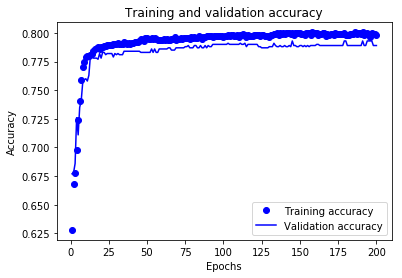

In [16]:
plot_history(history)

*(Results on the validation set did not improve. Let's try a middle value with 7 cells)*

In [19]:
model = models.Sequential()
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(np.array(train_data),
                    train_labels,
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, devtest_labels))

Epoch 1/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5563 - val_loss: 0.6563 - val_accuracy: 0.6840
Epoch 2/100
70/70 [==============================] - 0s 773us/step - loss: 0.6287 - accuracy: 0.7009 - val_loss: 0.6094 - val_accuracy: 0.6960
Epoch 3/100
70/70 [==============================] - 0s 839us/step - loss: 0.5846 - accuracy: 0.7177 - val_loss: 0.5713 - val_accuracy: 0.7220
Epoch 4/100
70/70 [==============================] - 0s 772us/step - loss: 0.5482 - accuracy: 0.7283 - val_loss: 0.5433 - val_accuracy: 0.7180
Epoch 5/100
70/70 [==============================] - 0s 835us/step - loss: 0.5190 - accuracy: 0.7454 - val_loss: 0.5223 - val_accuracy: 0.7440
Epoch 6/100
70/70 [==============================] - 0s 782us/step - loss: 0.4955 - accuracy: 0.7559 - val_loss: 0.5053 - val_accuracy: 0.7320
Epoch 7/100
70/70 [==============================] - 0s 837us/step - loss: 0.4764 - accuracy: 0.7615 - val_loss: 0.4938 - val_accuracy: 0.7360
E

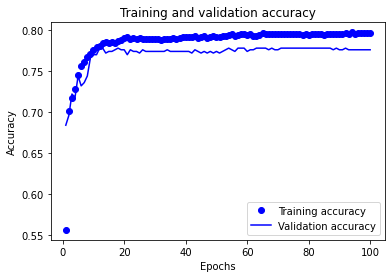

In [21]:
plot_history(history)

*(It seems that the ideal results were at 5 hidden cells. In none of the cases there was much overfitting.)*

# Optional: Deep Learning with the Movie Review Corpus
The notebook [W04L1-2-MovieReviews.ipynb](../lectures/W04L1-2-MovieReviews.ipynb) has several questions at the end, repeated below. Try to answer these, and indeed try other variants!

* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.